# Data exploration of predicted SoP dimensions

In [14]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score

from fiona.crs import from_epsg
%matplotlib inline

### Read Data

In [15]:
#road network
segs = gpd.read_file('road_network_data/osm/osm_w_collisions/edges/edges.shp').to_crs({'init': 'epsg:2263'})
nodes = gpd.read_file('road_network_data/osm/osm_w_collisions/nodes/nodes.shp').to_crs({'init': 'epsg:2263'})

#Predicted SoP dimensions
sop_dims = pd.read_csv('dataJoin/joined_road_segments/joined_final_predicted_sop.csv')

#Merge
segs_merged = pd.merge(segs, sop_dims, on='id')

In [16]:
segs.shape, sop_dims.shape, segs_merged.shape

((91666, 30), (92333, 111), (91666, 140))

In [17]:
segs.id.nunique(), sop_dims.id.nunique()

(91666, 91667)

**Note:** Need to check why we have duplicate ids in joined data.

In [18]:
segs_merged[sop_dims.columns[-11:]].describe()

,FORM3_norm,DENS2_norm,PROX3_norm,CONN5_norm,PARKS2_norm,PEDS3_norm,SAFE_norm,TRAFFIC5_norm,AESTTOT3_norm,PAF2_norm,SoPIndex6_norm
count,91666.000000,91666.000000,9.166600e+04,91666.000000,91666.000000,91666.000000,9.166600e+04,91666.000000,91666.000000,91666.000000,91666.000000
mean,10.100264,62.003420,5.677050e+00,55.498266,3.916963,20.365311,8.272165e+01,60.542762,34.745884,0.790748,39.823269
std,6.620268,16.639891,7.760941e+00,3.947225,7.052029,6.395790,9.138936e+00,8.215609,4.237218,4.795995,6.048964
min,2.249382,26.194760,3.746523e-07,53.268287,0.143733,2.863829,-7.835784e-07,26.587051,21.335723,0.005288,21.209051
25%,10.434668,53.370666,1.160818e+00,53.268287,0.143733,17.403429,8.055803e+01,61.767410,31.490427,0.005288,36.694549
50%,10.434668,64.087076,1.160818e+00,53.962696,0.143733,19.014806,8.055803e+01,63.564348,34.830253,0.005288,39.383816
75%,10.434668,73.151091,7.479416e+00,53.962696,9.017515,20.968499,9.188717e+01,64.483592,35.150538,0.005288,42.589427
max,59.307432,94.682382,1.000000e+02,84.955819,60.676923,55.283858,9.188717e+01,78.405060,62.840780,65.795662,87.975488


### Plot segments by SoP dimension

In [19]:
dimensions = {
 'Form':'form3',
 'Dens':'dens2',
 'Conn':'conn5',
 'Prox':'prox3',
 'Parks':'parks2',
 'Rec':'paf2',
 'Peds':'peds3',
 'Traf':'traffic5',
 'Aest':'aesttot3',
 'Safe':'safe'
}

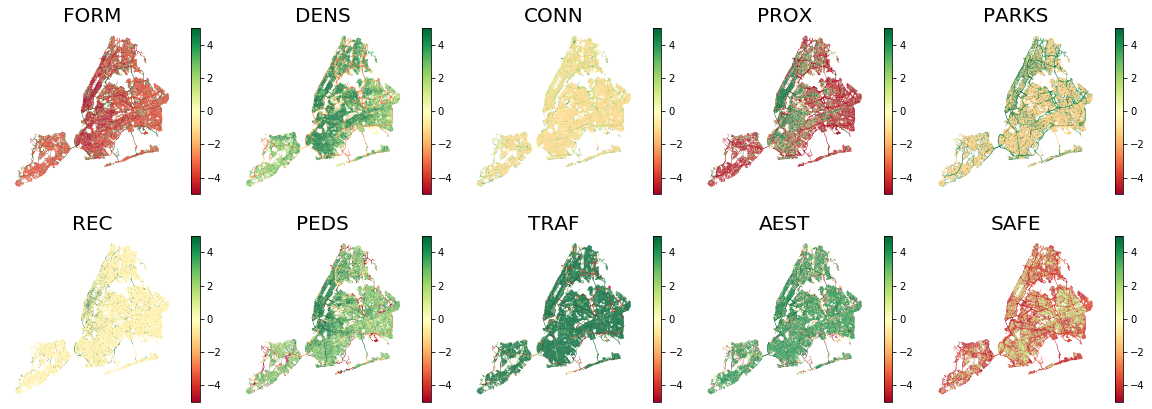

In [20]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,7))

for i, (key, value) in enumerate(dimensions.items()):
    ax = axes.flatten()[i]
    
    #To better place colorbar (https://github.com/geopandas/geopandas/pull/894)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2) # depends on the user needs
    
    segs_merged.plot(column=value.upper(), cmap='RdYlGn', ax=ax, cax=cax,
                     lw=0.3, zorder=-1, alpha=1, legend=True,
                     vmin=-5, vmax=5)
    ax.set_title(key.upper(), fontsize=20)
    
for ax in axes.flatten():
    ax.axis('off')

plt.show()

**Note:** I fixed the legends from -5 to 5.

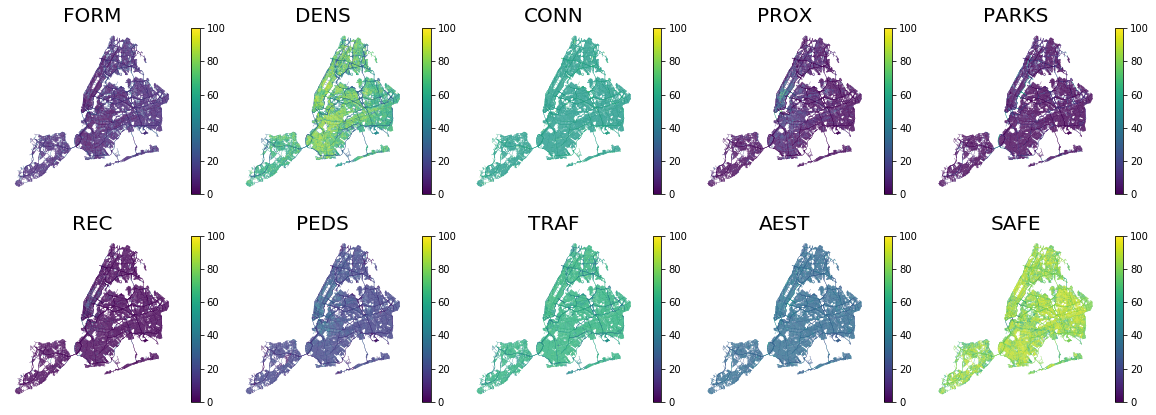

In [28]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,7))

for i, (key, value) in enumerate(dimensions.items()):
    ax = axes.flatten()[i]
    
    #To better place colorbar (https://github.com/geopandas/geopandas/pull/894)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2) # depends on the user needs
    
    segs_merged.plot(column=value.upper() + '_norm', cmap='viridis', ax=ax, cax=cax,
                     lw=0.3, zorder=-1, alpha=1, legend=True,
                     vmin=0, vmax=100)
    ax.set_title(key.upper(), fontsize=20)
    
for ax in axes.flatten():
    ax.axis('off')

plt.show()

**Notes:** Using the normalized score here, forcing the color from 0-100, not very useful.

### Compare with survey data from NYC hotspots

**Note:** Only the ones we could join

In [21]:
nyc_manual = pd.read_csv('NYC_samples/segs_275.csv', index_col=0)
nyc_manual.columns = [x.upper() if x == 'service' else x.lower() if x != 'ID' else x for x in nyc_manual.columns]
nyc_manual.head()

,access,bridge,from,highway,junction,key,lanes,length,maxspeed,name,...,sopindex3,sopindex4,sopindex5,filter_$,intersection_3_location,intersection_4_location,intersection_3_geometry,intersection_4_geometry,nodeid1,nodeid2
0,NaN,NaN,42535075,residential,NaN,0,NaN,234.050,NaN,Park Place,...,28.705021,26.960046,28.853223,1,"[-73.944562, 40.673129]","[-73.941927, 40.672983]",POINT (999628.0892733529 184520.3172313557),POINT (1000359.053853451 184467.5988587733),42535075,42467454
1,NaN,NaN,42770335,residential,NaN,0,NaN,162.738,NaN,Independence Avenue,...,-10.397207,-12.142182,-10.249006,1,"[-73.910178, 40.903017]","[-73.910529, 40.901628]",POINT (1009080.069347438 268284.3176080702),POINT (1008983.55710407 267778.1482810826),42770335,1819673049
2,NaN,NaN,42469180,residential,NaN,0,NaN,148.647,NaN,"['Adams Street', 'John Street']",...,60.523674,58.778699,60.671875,1,"[-73.987545, 40.704447]","[-73.988493, 40.703867]",POINT (987703.3023351547 195925.7592588682),POINT (987440.4854051548 195714.4119484519),42469180,42472722
3,NaN,NaN,42471570,residential,NaN,0,NaN,245.588,NaN,Preston Court,...,5.926142,4.181167,6.074344,1,"[-73.917401, 40.642571]","[-73.919476, 40.641268]",POINT (1007172.844872034 173393.1273763761),POINT (1006597.428166238 172917.8730457805),42469952,42471570
4,NaN,NaN,3037067011,residential,NaN,0,NaN,40.204,NaN,NaN,...,-5.590664,-6.940973,-6.159589,1,"[-73.92661, 40.789371]","[-73.926942, 40.789533]",POINT (1004572.357827813 226874.565051419),POINT (1004480.374806828 226933.5103486902),277482212,3037067011


In [22]:
len(nyc_manual)

275

In [23]:
sop_dims.columns = [x.lower() for x in sop_dims.columns]

In [24]:
nyc_manual_joined = pd.merge(nyc_manual, sop_dims, on='id', suffixes=('_manual', '_auto'))
nyc_manual_joined.head()

,access,bridge,from,highway,junction,key,lanes,length,maxspeed,name,...,dens2_norm,prox3_norm,conn5_norm,parks2_norm,peds3_norm,safe_norm,traffic5_norm,aesttot3_norm,paf2_norm,sopindex6_norm
0,NaN,NaN,42535075,residential,NaN,0,NaN,234.050,NaN,Park Place,...,79.197979,1.160818,53.962696,9.017515,31.692850,91.887175,63.564348,34.830253,0.005288,46.387320
1,NaN,NaN,42770335,residential,NaN,0,NaN,162.738,NaN,Independence Avenue,...,64.087076,1.160818,53.268287,0.143733,2.863829,65.489211,49.781804,31.383537,0.005288,25.159443
2,NaN,NaN,42469180,residential,NaN,0,NaN,148.647,NaN,"['Adams Street', 'John Street']",...,65.211200,30.219734,53.268287,0.143733,20.023670,65.489211,64.483592,31.383537,0.005288,41.839625
3,NaN,NaN,42471570,residential,NaN,0,NaN,245.588,NaN,Preston Court,...,38.474319,1.160818,53.962696,0.143733,20.187029,80.558026,63.564348,31.490427,30.766375,43.382630
4,NaN,NaN,3037067011,residential,NaN,0,NaN,40.204,NaN,NaN,...,35.990725,1.160818,64.636095,9.017515,15.394194,80.558026,31.629472,31.383537,0.005288,30.378286


### Scatter plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead o

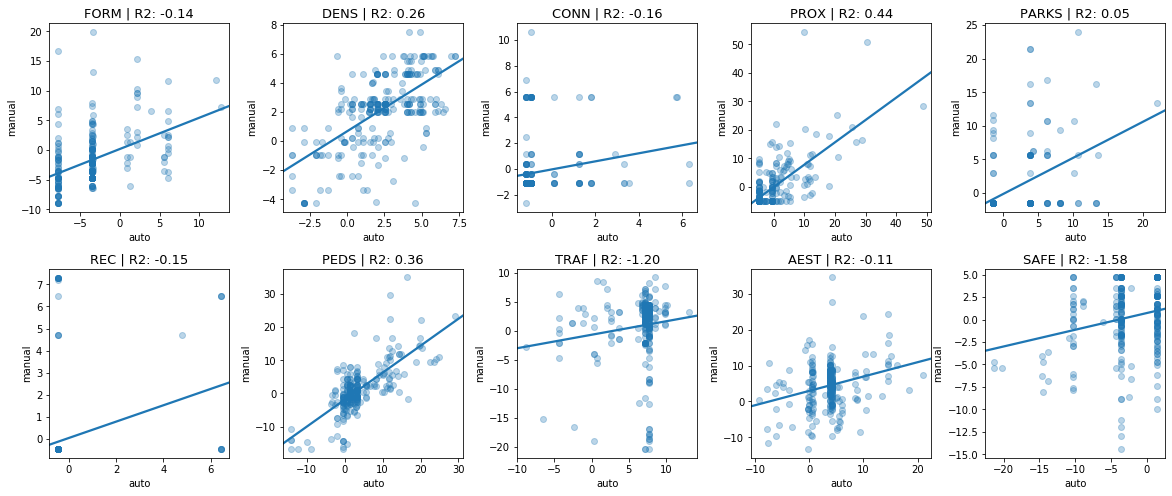

In [25]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8))
plt.subplots_adjust(hspace=.3, wspace=.3)

for i, (key, value) in enumerate(dimensions.items()):
    ax = axes.flatten()[i]
    
    manual = nyc_manual_joined['{}_manual'.format(value)]
    auto = nyc_manual_joined['{}_auto'.format(value)]
    
    r2 = r2_score(manual, auto)
    mse = mean_squared_error(manual, auto)
    
    sns.regplot(x=auto, y=manual,
                ax=ax, color='tab:blue', scatter_kws={'alpha':0.3},ci=False)
    
    ax.set_xlabel('auto')
    ax.set_ylabel('manual')
    ax.set_title('{} | R2: {:.2f}'.format(key.upper(), r2), fontsize=13)

plt.show()